In [1]:
import torch
from d2l import torch as d2l

In [2]:
# 平均汇聚层可以被视为输入的加权平均值，其中各输入的权重是一样的。实际上，注意力汇聚得到的是加权平均的总和值，其中权重
# 是在给定的查询和不同键之间计算得出的

In [3]:
# 为了可视化注意力权重，需要定义一个show_heatmaps函数，其输入matrices的形状是（要显示的行数、要显示的列数，查询的数目，键的数目）
def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(2.5, 2.5), cmap='Reds'):
    """显示矩阵热图"""
    d2l.use_svg_display()
    num_rows, num_cols = matrices.shape[0], matrices.shape[1]
    fig, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize, sharex=True, sharey=True, squeeze=False)
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        print(row_axes, row_matrices)
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap)
            print(ax, matrix)
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            if j == 0:
                ax.set_ylabel(ylabel)
            if titles:
                ax.set_title(titles[j])
    fig.colorbar(pcm, ax=axes, shrink=0.6)

[<AxesSubplot:>] tensor([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]])
AxesSubplot(0.125,0.11;0.775x0.77) tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.,

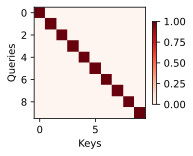

In [4]:
attention_weights = torch.eye(10).reshape((1, 1, 10, 10))  # 生成单位矩阵
show_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries')

In [5]:
torch.eye(10)

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

[<AxesSubplot:>] tensor([[[0.1442, 0.1261, 0.0613, 0.0591, 0.1266, 0.0601, 0.1390, 0.0722,
          0.0615, 0.1499],
         [0.1215, 0.1249, 0.1096, 0.0992, 0.0720, 0.0720, 0.0927, 0.0838,
          0.1268, 0.0974],
         [0.1418, 0.0603, 0.1427, 0.0847, 0.0634, 0.0610, 0.1250, 0.0660,
          0.1147, 0.1404],
         [0.1180, 0.0954, 0.0901, 0.1179, 0.0551, 0.0891, 0.1300, 0.1221,
          0.0931, 0.0890],
         [0.0938, 0.1165, 0.0748, 0.0993, 0.1030, 0.1552, 0.1190, 0.0819,
          0.0733, 0.0833],
         [0.0939, 0.0986, 0.0719, 0.0905, 0.1375, 0.0732, 0.0858, 0.0991,
          0.1265, 0.1231],
         [0.0710, 0.1654, 0.0869, 0.0946, 0.1510, 0.0921, 0.1180, 0.0833,
          0.0678, 0.0700],
         [0.0673, 0.0615, 0.0958, 0.1244, 0.1368, 0.0718, 0.1442, 0.0810,
          0.1330, 0.0844],
         [0.0736, 0.1511, 0.1317, 0.1071, 0.1216, 0.0798, 0.0613, 0.0642,
          0.0656, 0.1440],
         [0.1071, 0.1163, 0.1411, 0.0624, 0.0934, 0.0729, 0.0985, 0.0951,


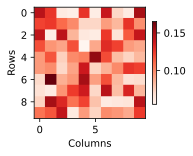

In [9]:
a = torch.rand((10, 10))
a = torch.nn.functional.softmax(a, dim=1)
a = a.reshape((1, 1, 10, 10))
show_heatmaps(a, xlabel='Columns', ylabel='Rows')

In [14]:
n_test = 3
n_train=2
x_test = torch.tensor([1, 2, 3])
x_train = torch.tensor([4, 5])
x_repeat = x_test.repeat_interleave(n_train).reshape((-1, n_train))

In [16]:
x_repeat - x_train

tensor([[-3, -4],
        [-2, -3],
        [-1, -2]])

In [18]:
a = torch.rand((1, 2, 3)) + torch.rand(1,  3, 3)

tensor([[[[0.9172, 0.8290, 1.2646],
          [0.8476, 1.3786, 1.1170],
          [1.5330, 1.2057, 1.4407]],

         [[0.2473, 0.6037, 1.0953],
          [0.1777, 1.1533, 0.9477],
          [0.8630, 0.9804, 1.2714]]]])

In [19]:
a.shape

torch.Size([1, 1, 10, 10])

In [34]:
a = torch.arange(6).reshape(1, 2, 3)
b = torch.arange(12).reshape(1, 4, 3)

In [37]:
a  , b

(tensor([[[0, 1, 2],
          [3, 4, 5]]]),
 tensor([[[ 0,  1,  2],
          [ 3,  4,  5],
          [ 6,  7,  8],
          [ 9, 10, 11]]]))

In [38]:
a.unsqueeze(2) , b.unsqueeze(1)

(tensor([[[[0, 1, 2]],
 
          [[3, 4, 5]]]]),
 tensor([[[[ 0,  1,  2],
           [ 3,  4,  5],
           [ 6,  7,  8],
           [ 9, 10, 11]]]]))

In [28]:
a.unsqueeze(2) + b.unsqueeze(1)

tensor([[[[ 0,  2,  4],
          [ 3,  5,  7],
          [ 6,  8, 10],
          [ 9, 11, 13]],

         [[ 3,  5,  7],
          [ 6,  8, 10],
          [ 9, 11, 13],
          [12, 14, 16]]]])